In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from vega_datasets import data

# Question Set 1

In [2]:
temps = data.sf_temps()
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## Exercise 1
Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
#setting the date as the index
temps = temps.set_index('date').sort_index()

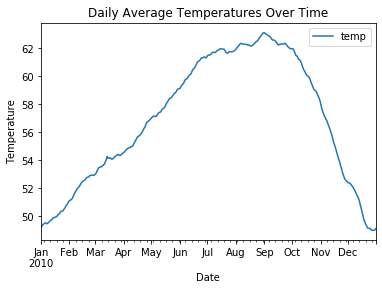

In [4]:
temps.resample('D').mean().plot()
plt.title('Daily Average Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 2
Write the code necessary to visualize the minimum temperature over time.

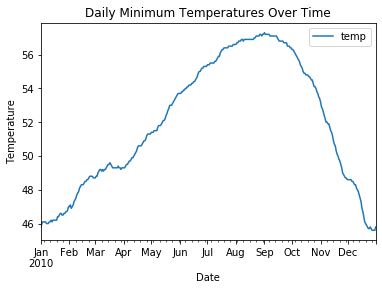

In [5]:
temps.resample('D').min().plot()
plt.title('Daily Minimum Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 3
Write the code necessary to visualize the maximum temperature over time.

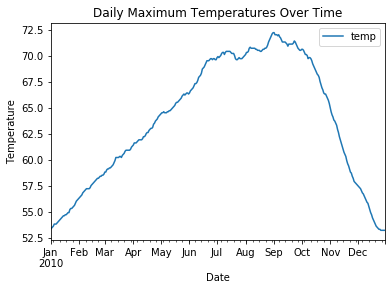

In [6]:
temps.resample('D').max().plot()
plt.title('Daily Maximum Temperatures Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Exercise 4
Which month is the coldest, on average?

In [42]:
temps.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [16]:
temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


- January is the coldest month on average by half a degrees.

## Exercise 5
Which month has the highest average temperature?

In [43]:
temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [8]:
temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


- September is the hottest month on average, barely beating out August.

## Exercise 6
Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [25]:
min_max_temps = temps.resample('D')['temp'].agg(['min', 'max'])
min_max_temps['variability'] = (min_max_temps['max']) - (min_max_temps['min'])

In [37]:
min_max_temps.variability.idxmax()

Timestamp('2010-08-31 00:00:00', freq='D')

In [107]:
min_max_temps.variability.max()

15.0

- August has the highest daily temperature variability.

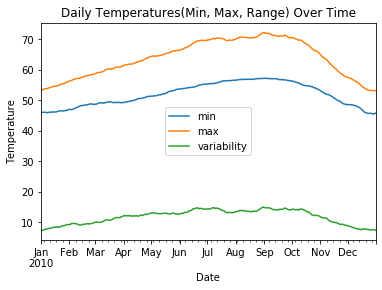

In [40]:
min_max_temps.plot()
plt.title('Daily Temperatures(Min, Max, Range) Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

## Bonus: 
Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [48]:
bonus = temps.resample('D')['temp'].agg(['min', 'max', 'mean'])

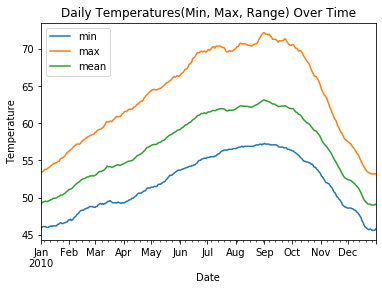

In [49]:
bonus.plot()
plt.title('Daily Temperatures(Min, Max, Average) Over Time')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

# Question Set 2

In [51]:
from vega_datasets import data

In [60]:
seattle = data.seattle_weather()
seattle = seattle.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


## Exercise 1
Which year and month combination has the highest amount of precipitation?

In [65]:
seattle.resample('M').precipitation.max().idxmax()

Timestamp('2015-03-31 00:00:00', freq='M')

In [63]:
seattle.resample('M').precipitation.max()

date
2012-01-31    27.7
2012-02-29    17.3
2012-03-31    27.4
2012-04-30    10.9
2012-05-31    18.5
2012-06-30    16.5
2012-07-31    15.2
2012-08-31     0.0
2012-09-30     0.3
2012-10-31    34.5
2012-11-30    54.1
2012-12-31    22.6
2013-01-31    38.4
2013-02-28     9.4
2013-03-31    11.9
2013-04-30    39.1
2013-05-31    13.7
2013-06-30     9.9
2013-07-31     0.0
2013-08-31    19.3
2013-09-30    43.4
2013-10-31     9.1
2013-11-30    30.0
2013-12-31    10.7
2014-01-31    21.6
2014-02-28    26.4
2014-03-31    46.7
2014-04-30    18.5
2014-05-31    33.3
2014-06-30     6.4
2014-07-31    19.3
2014-08-31    21.6
2014-09-30    20.3
2014-10-31    32.0
2014-11-30    34.3
2014-12-31    20.6
2015-01-31    26.2
2015-02-28    26.2
2015-03-31    55.9
2015-04-30    14.0
2015-05-31     6.1
2015-06-30     4.6
2015-07-31     2.0
2015-08-31    32.5
2015-09-30     5.8
2015-10-31    33.0
2015-11-30    47.2
2015-12-31    54.1
Freq: M, Name: precipitation, dtype: float64

- March of 2015 had the highest amount of precipitation.

## Exercise 2
Visualize the amount of monthly precipitation over time.

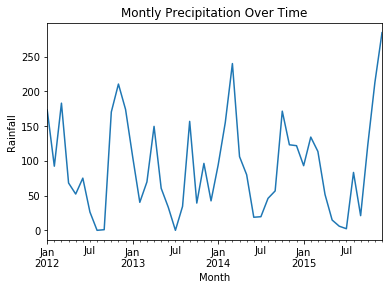

In [70]:
seattle.resample('M').precipitation.sum().plot()
plt.title('Montly Precipitation Over Time')
plt.ylabel('Rainfall')
plt.xlabel('Month')
plt.show()

## Exercise 3
Visualize the amount of wind over time. Choose a time interval you think is appropriate.

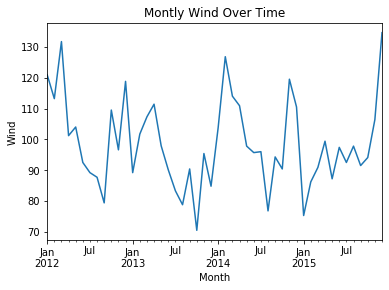

In [72]:
seattle.resample('M').wind.sum().plot()
plt.title('Montly Wind Over Time')
plt.ylabel('Wind')
plt.xlabel('Month')
plt.show()

## Exercise 4
Which year-month combination is the windiest?

In [73]:
seattle.resample('M').wind.max().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

In [74]:
seattle.resample('M').wind.max()

date
2012-01-31    8.2
2012-02-29    8.1
2012-03-31    7.0
2012-04-30    8.0
2012-05-31    6.4
2012-06-30    6.4
2012-07-31    6.0
2012-08-31    4.7
2012-09-30    5.6
2012-10-31    7.3
2012-11-30    6.0
2012-12-31    9.5
2013-01-31    7.3
2013-02-28    8.1
2013-03-31    7.6
2013-04-30    6.4
2013-05-31    6.5
2013-06-30    5.7
2013-07-31    4.6
2013-08-31    4.6
2013-09-30    7.1
2013-10-31    6.3
2013-11-30    7.9
2013-12-31    8.8
2014-01-31    8.8
2014-02-28    7.9
2014-03-31    6.2
2014-04-30    5.8
2014-05-31    5.6
2014-06-30    5.0
2014-07-31    5.4
2014-08-31    4.1
2014-09-30    6.5
2014-10-31    5.4
2014-11-30    7.7
2014-12-31    6.7
2015-01-31    6.6
2015-02-28    6.6
2015-03-31    5.7
2015-04-30    6.5
2015-05-31    5.2
2015-06-30    5.0
2015-07-31    4.3
2015-08-31    5.8
2015-09-30    6.8
2015-10-31    7.2
2015-11-30    8.0
2015-12-31    7.6
Freq: M, Name: wind, dtype: float64

- December of 2012 had the highest amount of wind.

## Exercise 5
What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [95]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count()

date
2012-01-31     4
2012-02-29     8
2012-03-31     6
2012-04-30     8
2012-05-31    14
2012-06-30    10
2012-07-31    12
2012-08-31    24
2012-09-30    18
2012-10-31    11
2012-11-30     2
2012-12-31     1
2013-01-31     6
2013-02-28     2
2013-03-31     9
2013-04-30    14
2013-05-31    21
2013-06-30    25
2013-07-31    27
2013-08-31    27
2013-09-30    17
2013-10-31    18
2013-11-30    17
2013-12-31    22
2014-01-31    20
2014-02-28    11
2014-03-31    11
2014-04-30    20
2014-05-31    24
2014-06-30    24
2014-07-31    25
2014-08-31    23
2014-09-30    17
2014-10-31    11
2014-11-30    14
2014-12-31    11
2015-01-31     3
2015-02-28     9
2015-03-31    16
2015-04-30    19
2015-05-31    23
2015-06-30    26
2015-07-31    25
2015-08-31    20
2015-09-30    19
2015-10-31     5
2015-11-30     9
2015-12-31     6
Freq: M, Name: weather, dtype: int64

In [92]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count().resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [96]:
(seattle[seattle.weather == 'sun']).weather.resample('M').count().resample('Y').sum().idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

- 2014 was the sunniest year

## Exercise 6
In which month does it rain the most?

In [166]:
rain = seattle[seattle.weather == 'rain']

In [169]:
rain.groupby([rain.index.month], as_index=True).weather.count()

date
1     35
2     40
3     37
4     20
5     16
6     19
7     14
8      6
9      4
10    20
11    25
12    23
Name: weather, dtype: int64

In [170]:
rain.groupby([rain.index.month], as_index=True).weather.count().idxmax()

2

In [171]:
rain.groupby([rain.index.month], as_index=True).weather.count().max()

40

- February had the most days of rain. 

## Exercise 7
Which month has the most number of days with a non-zero amount of precipitation?

In [159]:
non_zero = seattle[seattle.precipitation != 0]

In [163]:
non_zero.groupby([non_zero.index.month], as_index=True).precipitation.count()

date
1     66
2     73
3     73
4     59
5     34
6     37
7     11
8     22
9     35
10    61
11    71
12    81
Name: precipitation, dtype: int64

In [164]:
non_zero.groupby([non_zero.index.month], as_index=True).precipitation.count().idxmax()

12

In [165]:
non_zero.groupby([non_zero.index.month], as_index=True).precipitation.count().max()

81

- December of 2012 has the most number of days with a non-zero amount of precipitation.

# Question Set 3

In [114]:
flights = data.flights_20k()
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## Exercise 1
Convert any negative delays to 0.

In [127]:
flights.loc[(flights.delay < 0),'delay'] = 0

## Exercise 2
Which hour of the day has the highest average delay?

In [176]:
flights.groupby([flights.index.hour], as_index = True).delay.mean()

date
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [177]:
flights.groupby([flights.index.hour], as_index = True).delay.mean().idxmax()

3

In [178]:
flights.groupby([flights.index.hour], as_index = True).delay.mean().max()

302.5

- The 3am hour has the most delays on average

## Exercise 3
Does the day of the week make a difference in the delay amount?

In [192]:
flights.groupby([flights.index.weekday], as_index = True).delay.mean()

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

- The day of the week does matter in the delay amount. Monday's and Saturday's is less than half the delay time as Friday

## Exercise 4
Does the month make a difference in the delay amount?

In [196]:
flights.resample('M').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

- There is a small difference in the delay amount in each month